# LOADING DATA

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('mod1_encoded_sem1.csv')

In [3]:
df = df.drop('DEPENDENTS',axis=1)
df = df.drop('YEAR',axis=1)
df = df.drop('REGION',axis=1)
df = df.drop('SCHOOL',axis=1)
df = df.drop('LEARNING STYLE',axis=1)
df = df.drop('GENDER',axis=1)

In [4]:
df.head()

,PROGRAM,RACE,RELIGION,STATE,INCOME,SPM ADDMATH,SPM PHY,SPM CHEM,SPM BIO,SEM1 CGPA
0,1,3,2,1,6,6,5,5,3,1
1,1,3,2,1,1,5,4,6,5,1
2,1,3,2,1,7,7,2,4,5,1
3,1,3,2,8,2,5,3,6,4,2
4,1,3,2,1,3,3,4,6,5,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PROGRAM      1241 non-null   int64
 1   RACE         1241 non-null   int64
 2   RELIGION     1241 non-null   int64
 3   STATE        1241 non-null   int64
 4   INCOME       1241 non-null   int64
 5   SPM ADDMATH  1241 non-null   int64
 6   SPM PHY      1241 non-null   int64
 7   SPM CHEM     1241 non-null   int64
 8   SPM BIO      1241 non-null   int64
 9   SEM1 CGPA    1241 non-null   int64
dtypes: int64(10)
memory usage: 97.1 KB


In [6]:
df.shape

(1241, 10)

# STANDARDIZING THE VARIABLE

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(df.drop('SEM1 CGPA',axis=1))

StandardScaler()

In [10]:
scaled_features = scaler.transform(df.drop('SEM1 CGPA',axis=1))

In [11]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,PROGRAM,RACE,RELIGION,STATE,INCOME,SPM ADDMATH,SPM PHY,SPM CHEM,SPM BIO
0,0.987985,0.380774,0.268071,-0.484640,1.337215,0.835125,1.609341,0.862124,0.338659
1,0.987985,0.380774,0.268071,-0.484640,-0.841157,0.403116,0.929098,1.355846,1.664452
2,0.987985,0.380774,0.268071,-0.484640,1.772890,1.267134,-0.431387,0.368402,1.664452
3,0.987985,0.380774,0.268071,1.660072,-0.405483,0.403116,0.248856,1.355846,1.001556
4,0.987985,0.380774,0.268071,-0.484640,0.030192,-0.460903,0.929098,1.355846,1.664452


# HOLD OUT VALIDATION (TRAIN TEST SPLIT)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(df_feat,df['SEM1 CGPA'],test_size=0.2,random_state=0)

# MODEL FITTING

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

# EVALUATION 1

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [20]:
print(confusion_matrix(y_test,pred))

[[76 32 15  0  0]
 [30 29 17  2  0]
 [11 20 10  1  1]
 [ 1  2  2  0  0]
 [ 0  0  0  0  0]]


In [22]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.64      0.62      0.63       123
           1       0.35      0.37      0.36        78
           2       0.23      0.23      0.23        43
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         0

    accuracy                           0.46       249
   macro avg       0.24      0.24      0.24       249
weighted avg       0.47      0.46      0.46       249



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# HYPERPARAMETER TUNING (ERROR RATE)

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# to hide unnecessary warning
import warnings
warnings.filterwarnings('ignore')

In [24]:
error_rate = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

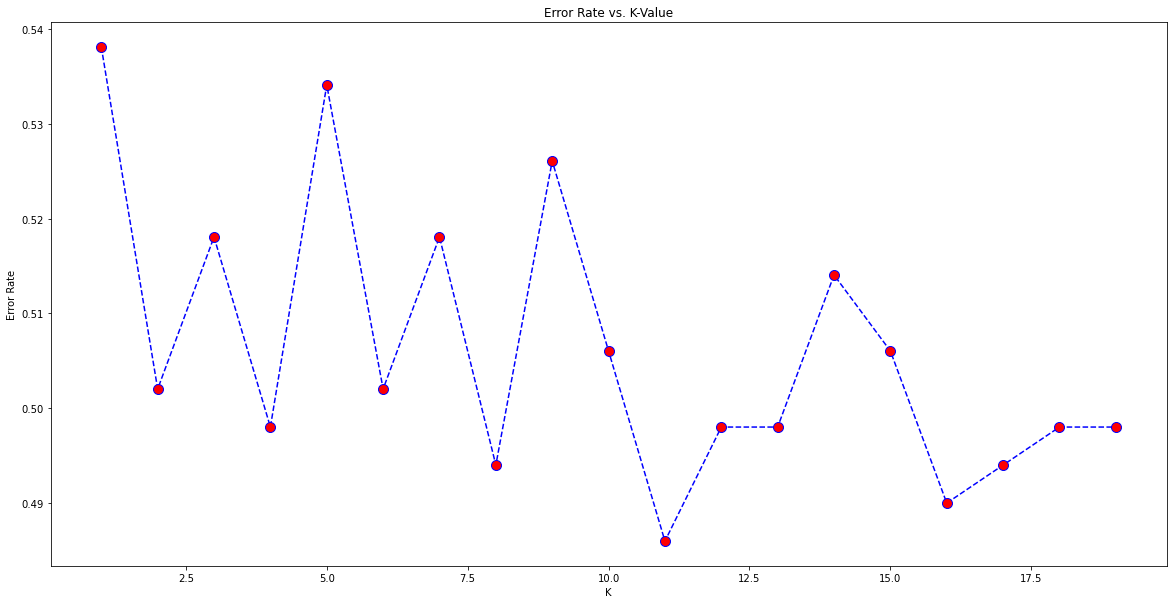

In [25]:
plt.figure(figsize=(20,10))
plt.plot(range(1,20),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize='10')
plt.title('Error Rate vs. K-Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# HYPERPARAMETER TUNING (ACCURACY SCORE)

In [26]:
from sklearn import metrics

In [27]:
# empty variable for storing the KNN metrics
scores = []

# we try diff values of k (from k=1 up to k=40)
lrange = np.arange(1,20)

# loop the KNN process
for k in lrange:
    # input the k-value and 'distance' measure
    knn = KNeighborsClassifier(n_neighbors=k)
    # input the train data to train KNN
    knn.fit(X_train,y_train)
    # see KNN prediction by inputting the test data
    y_pred = knn.predict(X_test)
    # append the performance metric (accuracy)
    scores.append(metrics.accuracy_score(y_test,y_pred))
    optimal_k = lrange[scores.index(max(scores))]

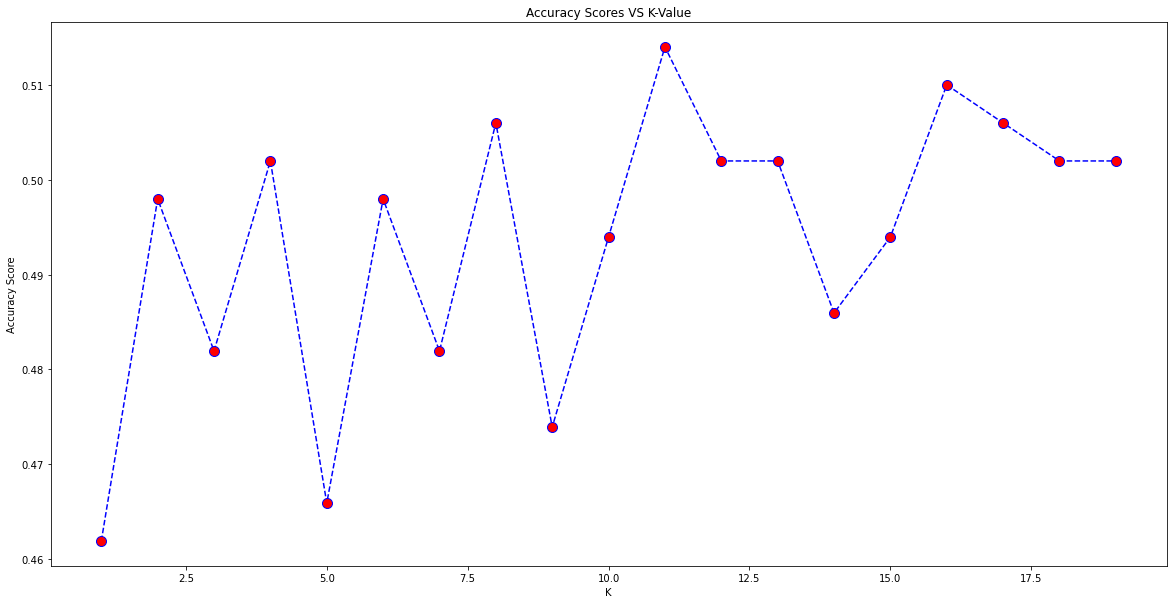

In [28]:
# plot accuracy scores vs k values
plt.figure(2,figsize=(20,10))
plt.plot(lrange,scores,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize='10')
plt.xlabel('K')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores VS K-Value')
plt.show()

In [29]:
print("Optimal k is %d" % optimal_k)
print("Optimal score is %.3f" % max(scores))

Optimal k is 11
Optimal score is 0.514


# EVALUATION 2

In [30]:
# EVALUATION WITH K = 1

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[76 32 15  0  0]
 [30 29 17  2  0]
 [11 20 10  1  1]
 [ 1  2  2  0  0]
 [ 0  0  0  0  0]]


              precision    recall  f1-score   support

           0       0.64      0.62      0.63       123
           1       0.35      0.37      0.36        78
           2       0.23      0.23      0.23        43
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         0

    accuracy                           0.46       249
   macro avg       0.24      0.24      0.24       249
weighted avg       0.47      0.46      0.46       249



In [32]:
# EVALUATION WITH K = 11

knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('KNN WITH K=11 (TARGET : SEM1 CGPA)')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

KNN WITH K=11 (TARGET : SEM1 CGPA)


[[86 33  4  0]
 [39 36  3  0]
 [15 22  6  0]
 [ 3  1  1  0]]


              precision    recall  f1-score   support

           0       0.60      0.70      0.65       123
           1       0.39      0.46      0.42        78
           2       0.43      0.14      0.21        43
           3       0.00      0.00      0.00         5

    accuracy                           0.51       249
   macro avg       0.36      0.33      0.32       249
weighted avg       0.49      0.51      0.49       249

